<a href="https://colab.research.google.com/github/Nityakalyani07/Annual-Income-Prediction/blob/main/Annual_income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from imblearn. over_sampling import SMOTE

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/income_evaluation.csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(32561, 15)

In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
stripped_columns = []
for item in list(df.columns):
    item = item.strip()
    stripped_columns.append(item)
#Replacing column names with stripped_columns
df.columns = stripped_columns
#Checking new column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter=="-":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [13]:
df.columns=new_columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [17]:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(df.select_dtypes(include=object).columns)

#printing mode of categorical variables
for item in categorical_var:
    print(item + " mode: "+ mode(df[item]))


0    workclass mode:  Private
Name: workclass, dtype: object
0    education mode:  HS-grad
Name: education, dtype: object
0    marital_status mode:  Married-civ-spouse
Name: marital_status, dtype: object
0    occupation mode:  Prof-specialty
Name: occupation, dtype: object
0    relationship mode:  Husband
Name: relationship, dtype: object
0    race mode:  White
Name: race, dtype: object
0    sex mode:  Male
Name: sex, dtype: object
0    native_country mode:  United-States
Name: native_country, dtype: object
0    income mode:  <=50K
Name: income, dtype: object


In [18]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [19]:
categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex:
[' Male' ' Female']
native_country:
[' United-States' ' Cuba' ' Jamaica' ' 

In [20]:
df['workclass'].replace(' ?', ' Unknown',inplace=True)
df['occupation'].replace(' ?', ' Unknown',inplace=True)
df['native_country'].replace(' ?', ' Unknown',inplace=True)

In [21]:
categorical_var = list(df.select_dtypes(include=object).columns)
numerical_var = list(df.select_dtypes(exclude=object).columns)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, '\nWorkclass Types')

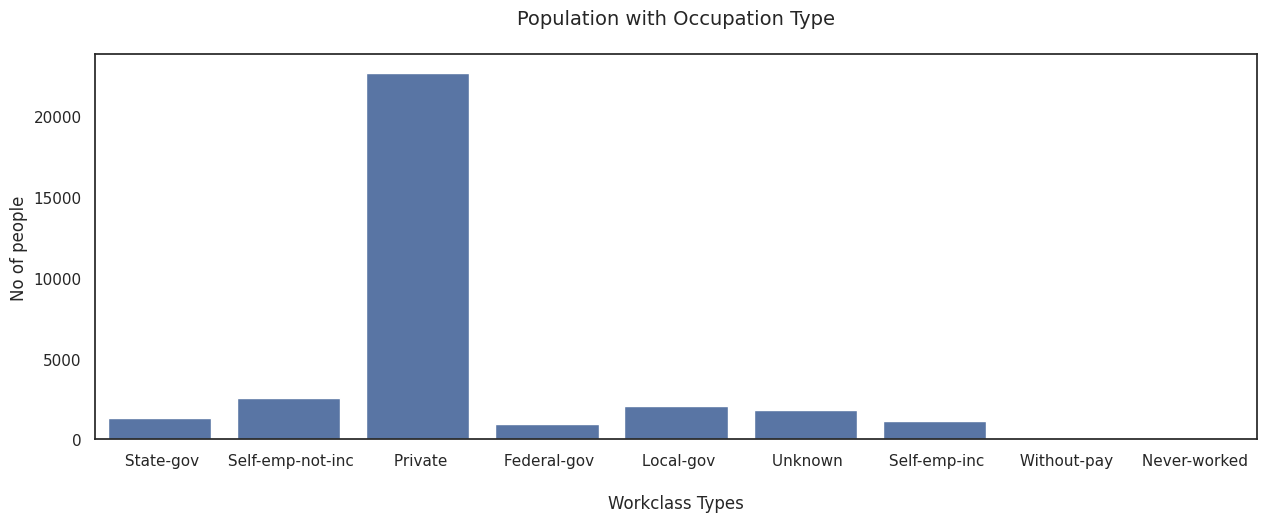

In [23]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="workclass", data=df)
plt.title("Population with Occupation Type\n",size =14)
plt.ylabel("No of people")
plt.xlabel("\nWorkclass Types")

Text(0.5, 0, '\n Education Level')

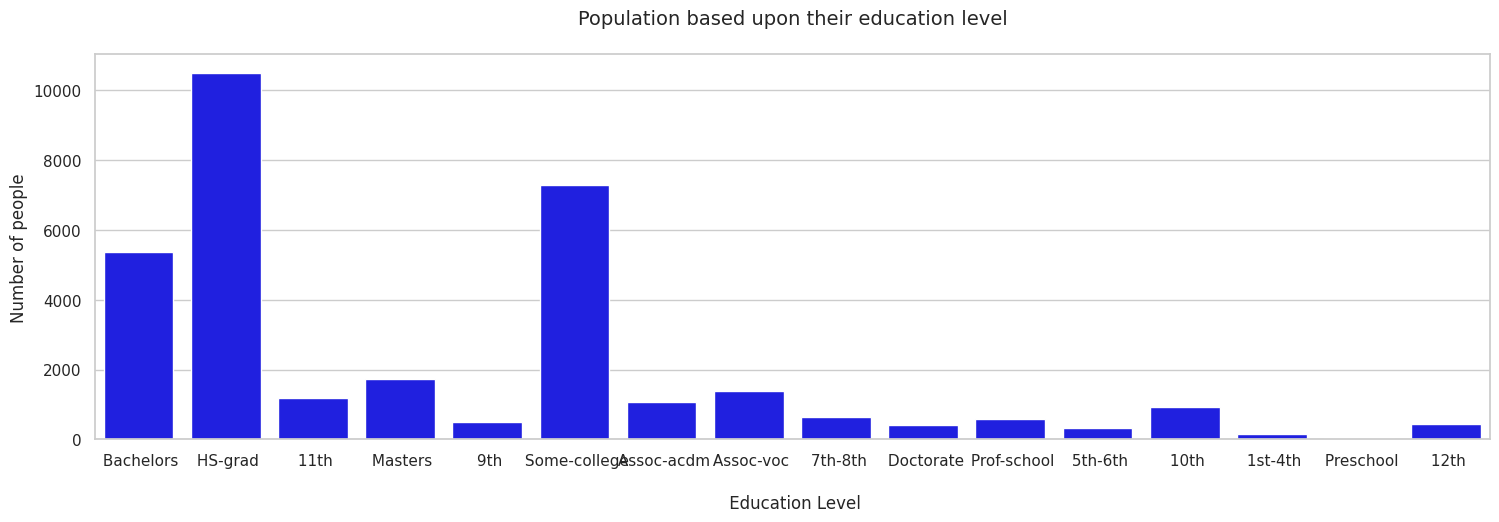

In [24]:
plt.figure(figsize=(18,5))
sns.set(style = 'whitegrid')
sns.countplot(x="education", data=df,color='blue')
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel("\n Education Level")

<Axes: xlabel='education', ylabel='count'>

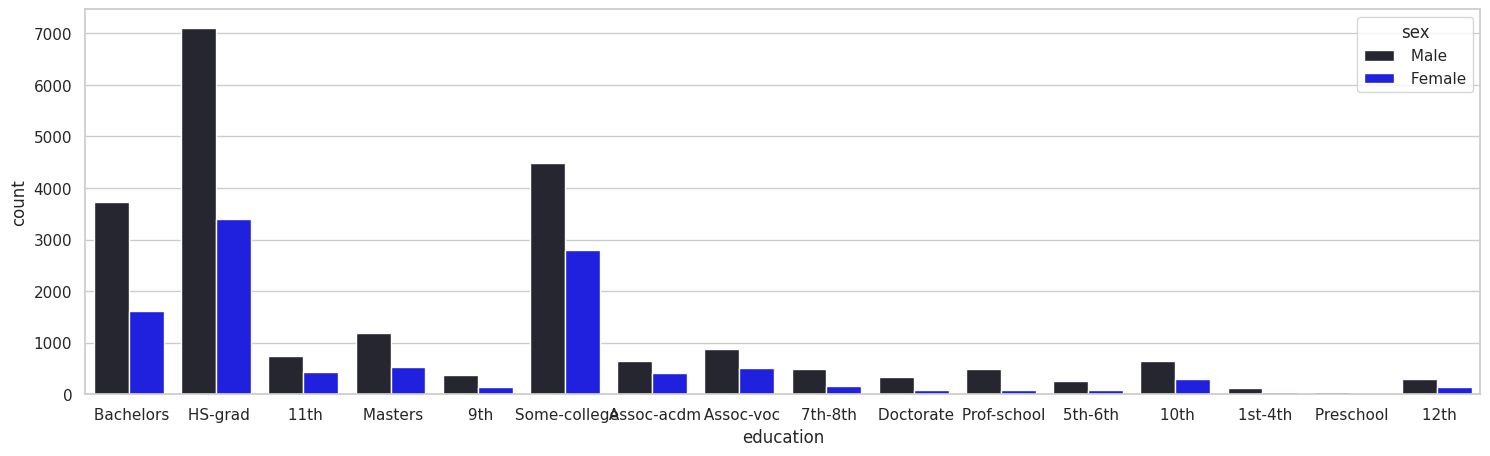

In [26]:
plt.figure(figsize=(18,5))
# Explicitly set the 'x' argument to 'education'
sns.countplot(x="education", data=df, hue="sex", color="blue")

<Axes: xlabel='marital_status', ylabel='count'>

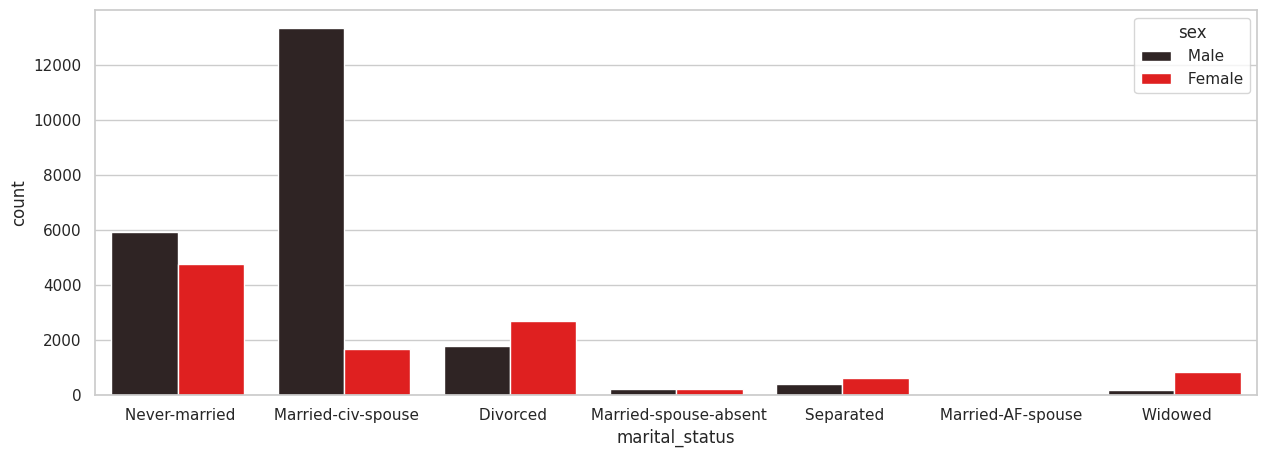

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x="marital_status",data=df,hue="sex",color="red")

<Axes: xlabel='income', ylabel='count'>

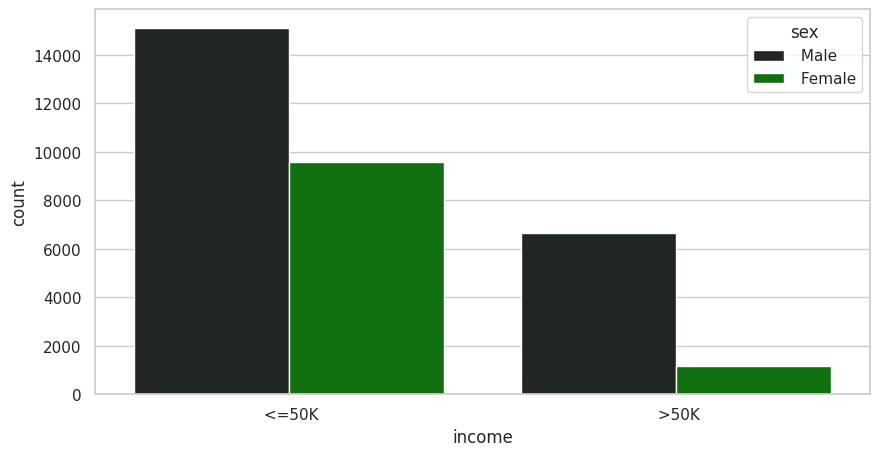

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="income",data=df,hue="sex",color="green")

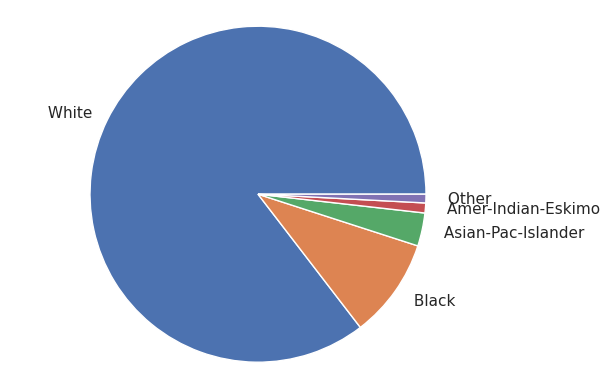

In [30]:
fig1, ax1 = plt.subplots()
X = list(df['race'].value_counts().index)
Y = list(df['race'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Age Histogram')

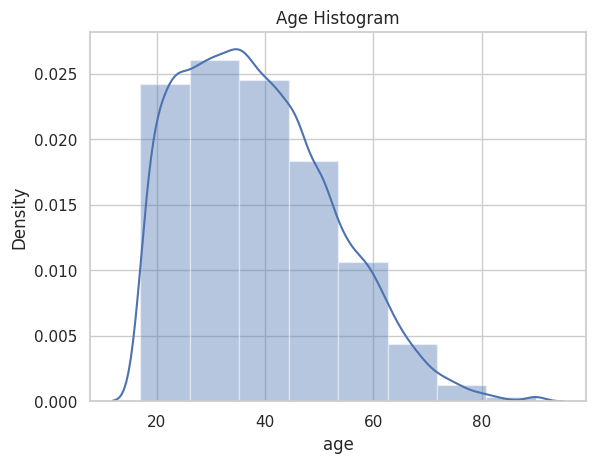

In [31]:
sns.distplot(df['age'],bins=8)
plt.title("Age Histogram")

Text(0.5, 1.0, 'Box plot representing age and income \n')

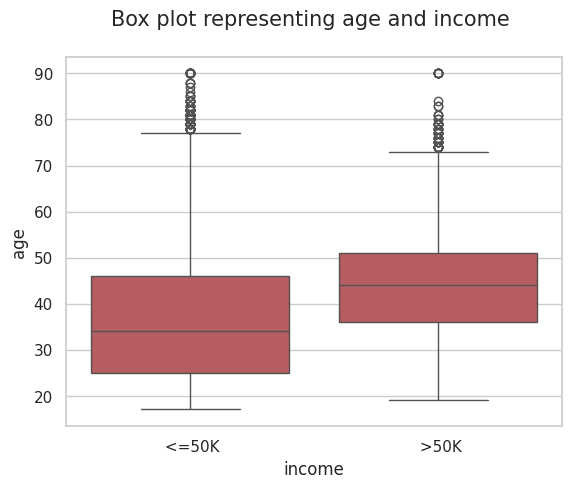

In [32]:
sns.boxplot(x=df['income'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

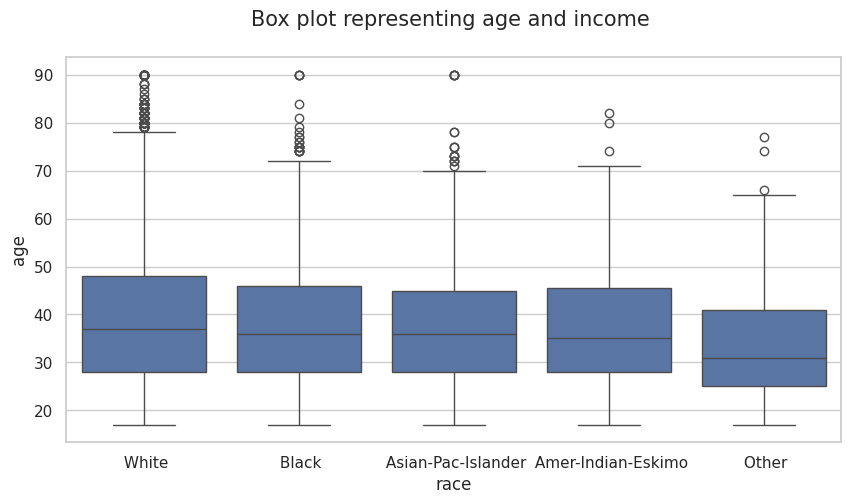

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['race'],y=df['age'],color='b')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

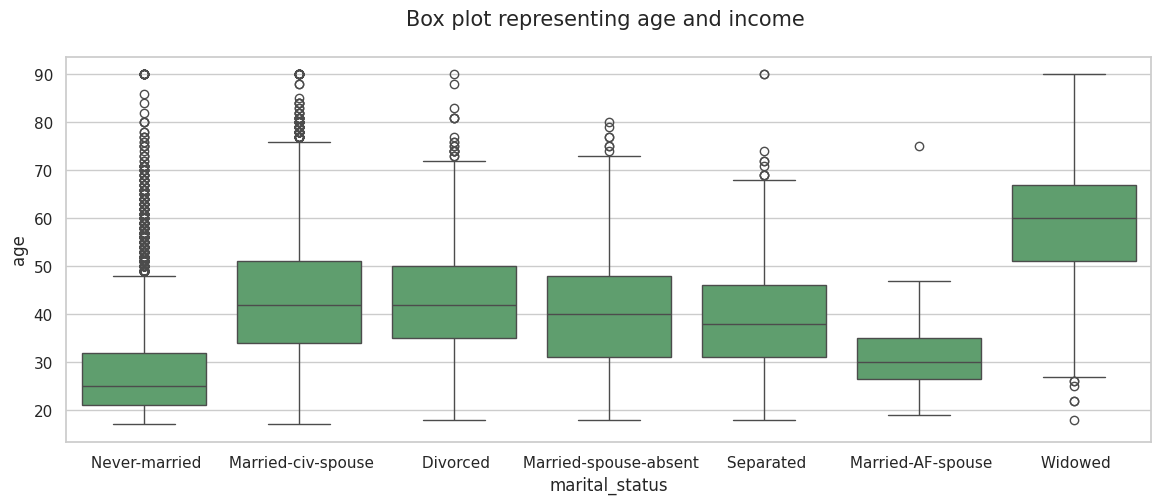

In [34]:
plt.figure(figsize=(14,5))
sns.boxplot(x=df['marital_status'],y=df['age'],color='g')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Relationship between hours worked and age')

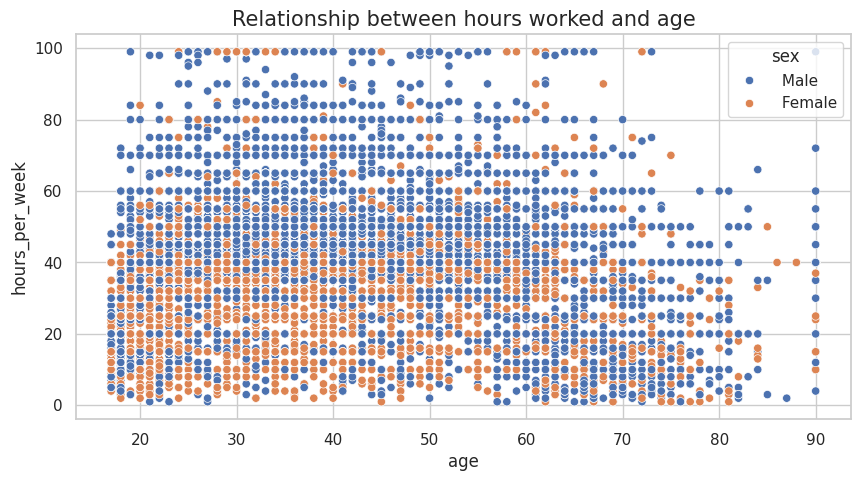

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y="hours_per_week",hue="sex",data=df)
plt.title('Relationship between hours worked and age',size=15)

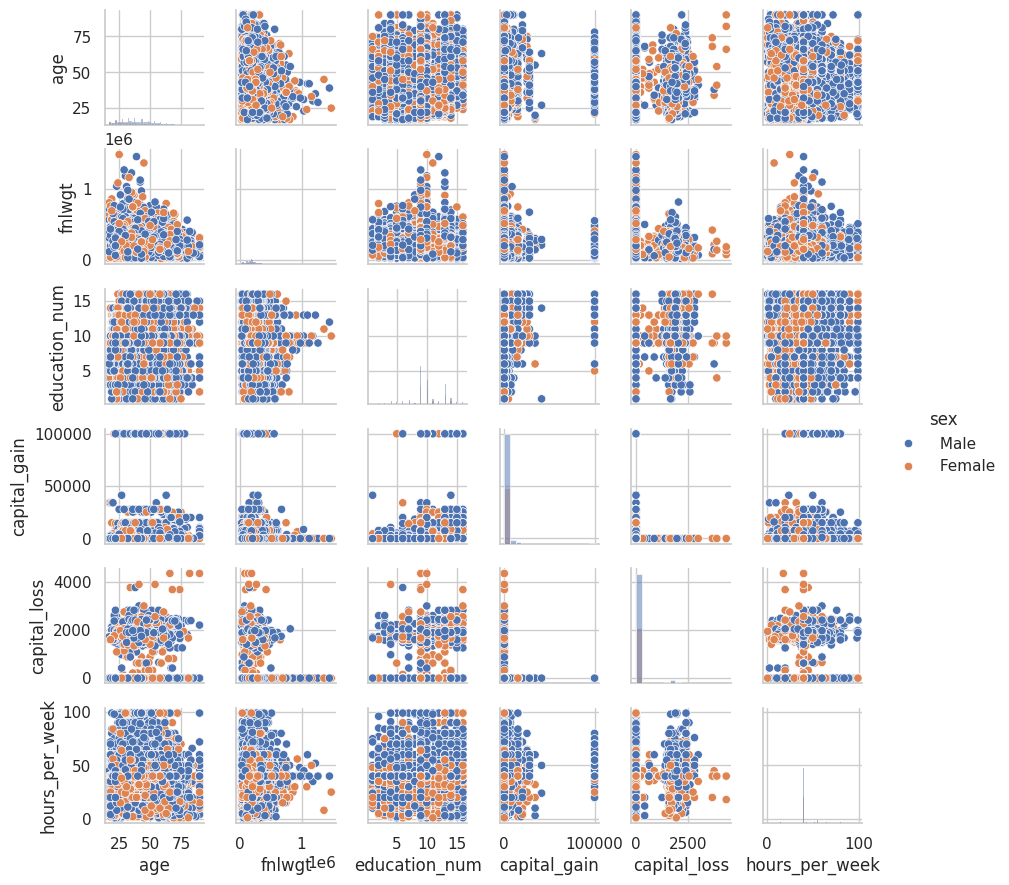

In [36]:
sns.pairplot(df,height =1.5, hue="sex", diag_kind="hist")

In [38]:
# Select only the numerical columns before calculating the standard deviation
numerical_df = df.select_dtypes(include=np.number)
numerical_df.std()

,0
age,13.640433
fnlwgt,105549.977697
education_num,2.572720
capital_gain,7385.292085
capital_loss,402.960219
hours_per_week,12.347429


In [39]:
ategorical_var = list(df.select_dtypes(include=object).columns)
zero_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)==1:
        zero_cardinality.append(column)
zero_cardinality

[]

In [40]:
high_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)>100:
        high_cardinality.append(column)
high_cardinality

[]

In [41]:
df=df.drop('relationship',axis=1)

In [42]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [43]:
numerical_var = list(df.select_dtypes(exclude=object).columns)
array = df[numerical_var].values
scaler = StandardScaler().fit(array)
df[numerical_var] = pd.DataFrame(scaler.transform(array))

In [44]:
df[numerical_var].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [45]:
df[numerical_var].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [46]:
categorical_var = list(set(df.dtypes[df.dtypes==object].index) - set(['income']))
#Creating dummy variables adn assigning dummy variabels to their original columns
dummy_cat_df = pd.get_dummies(df[categorical_var],drop_first=True)
df=df.drop(categorical_var,axis=1)
df=pd.concat([df,dummy_cat_df],axis = 1)

In [47]:
dummy_cat_df1 = pd.get_dummies(df['income'],drop_first=True)
df=df.drop('income',axis=1)
df=pd.concat([df,dummy_cat_df1],axis = 1)

In [48]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Unknown,native_country_ Vietnam,native_country_ Yugoslavia,>50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df[' >50K'].value_counts()

,count
>50K,
False,24720
True,7841


In [51]:
from imblearn. over_sampling import SMOTE
os= SMOTE(random_state=0)
input_var = list(set(df.columns)-set([' >50K']))



X,Y = os.fit_resample(df[input_var],df[' >50K'])


X=pd.DataFrame(X,columns=input_var)
Y = pd.DataFrame(Y,columns = [' >50K'])



df = pd.concat([X,Y],axis = 1)

In [52]:
df[' >50K'].value_counts()

,count
>50K,
False,24720
True,24720


In [53]:
df.rename(columns={' >50K':'income'},inplace=True)

In [55]:
from imblearn. over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np # Import numpy if needed for numerical operations
# Assuming df is already loaded and processed as in the user's notebook

os= SMOTE(random_state=0)
# Renamed the column before selecting input_var for SMOTE to align with the final code structure
df.rename(columns={' >50K':'income'},inplace=True)

# Use .columns to get a Pandas Index object, then convert to list for consistency
input_var = list(df.columns.drop('income'))

# os.fit_sample is deprecated, use os.fit_resample instead
X,Y = os.fit_resample(df[input_var],df['income'])

X=pd.DataFrame(X,columns=input_var)
Y = pd.DataFrame(Y,columns = ['income']) # Use the new column name 'income'

df = pd.concat([X,Y],axis = 1)

# Rename the income column to avoid issues later
df.rename(columns={'income':'income'},inplace=True)

# Convert the set of input_var to a list for indexing
input_var  = list(set(df.columns) - set(['income']))
X = df[input_var]
Y = df['income']

models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN','Support Vector Machine','Neural Networks']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [56]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [57]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [58]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [59]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [60]:
SVM = svm.LinearSVC()
SVM.fit(X_train, Y_train)

LinearSVC()

In [61]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [62]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [64]:
# Assuming DecisionTreeClassifier is already imported
dt = DecisionTreeClassifier(random_state=0) # creates a Decision Tree instance
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
# First, fit the Decision Tree model
from sklearn.tree import DecisionTreeClassifier # Ensure this is imported
dt = DecisionTreeClassifier(random_state=0) # creates a Decision Tree instance
dt.fit(X_train, Y_train)

# Now, make the predictions for all models
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

pred_Y_svm = SVM.predict(X_test) # predicts the Y given the fitted model Support Vector Machines
pred_Y_nn = NN.predict(X_test)

In [66]:
# accuracy, sensitivity, and specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(Y_test, pred_Y_lr)


# accuracy, sensitivity, and specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performances(Y_test, pred_Y_dt)


# accuracy, sensitivity, and specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(Y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(Y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(Y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Neural Networks
accuracy_nn, sensitivity_nn, specificity_nn = get_performances(Y_test, pred_Y_nn)

In [67]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nn],
                    columns = ['accuracy'],
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN','Support Vector Machine','Neural Networks'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt,
                                  sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_nn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn,specificity_svm,specificity_nn])
perf

,accuracy,sensitivity,specificity
Logistic Regression,0.841873,0.814505,0.869087
Decision Trees,0.848554,0.843270,0.853808
Random Forest,0.829738,0.739152,0.919814
K-NN,0.860260,0.792256,0.927882
Support Vector Machine,0.841138,0.804671,0.877399
Neural Networks,0.856092,0.824093,0.887911


In [68]:
from sklearn.metrics import roc_curve, auc

In [69]:
score_Y_nn = NN.predict_proba(X_test)
score_Y_nn

array([[9.98216803e-01, 1.78319683e-03],
       [9.84634207e-01, 1.53657933e-02],
       [2.74685449e-01, 7.25314551e-01],
       ...,
       [9.99309252e-01, 6.90748484e-04],
       [7.45198653e-02, 9.25480135e-01],
       [2.40972190e-02, 9.75902781e-01]])

In [70]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

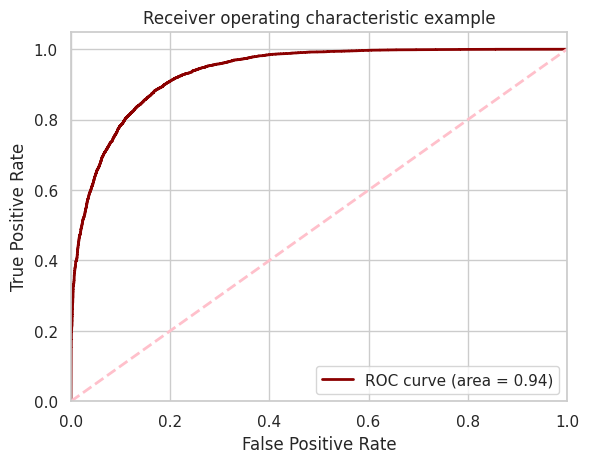

In [71]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [72]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [73]:
ft_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ft_scores

,0
marital_status_ Married-civ-spouse,1.730492e-01
age,1.716941e-01
fnlwgt,1.205558e-01
hours_per_week,9.541219e-02
education_num,7.339755e-02
...,...
native_country_ Outlying-US(Guam-USVI-etc),7.468361e-06
occupation_ Armed-Forces,7.387234e-06
native_country_ Honduras,3.249712e-06
native_country_ Holand-Netherlands,1.236716e-06


<Axes: xlabel='Columns', ylabel='feature_scores \n'>

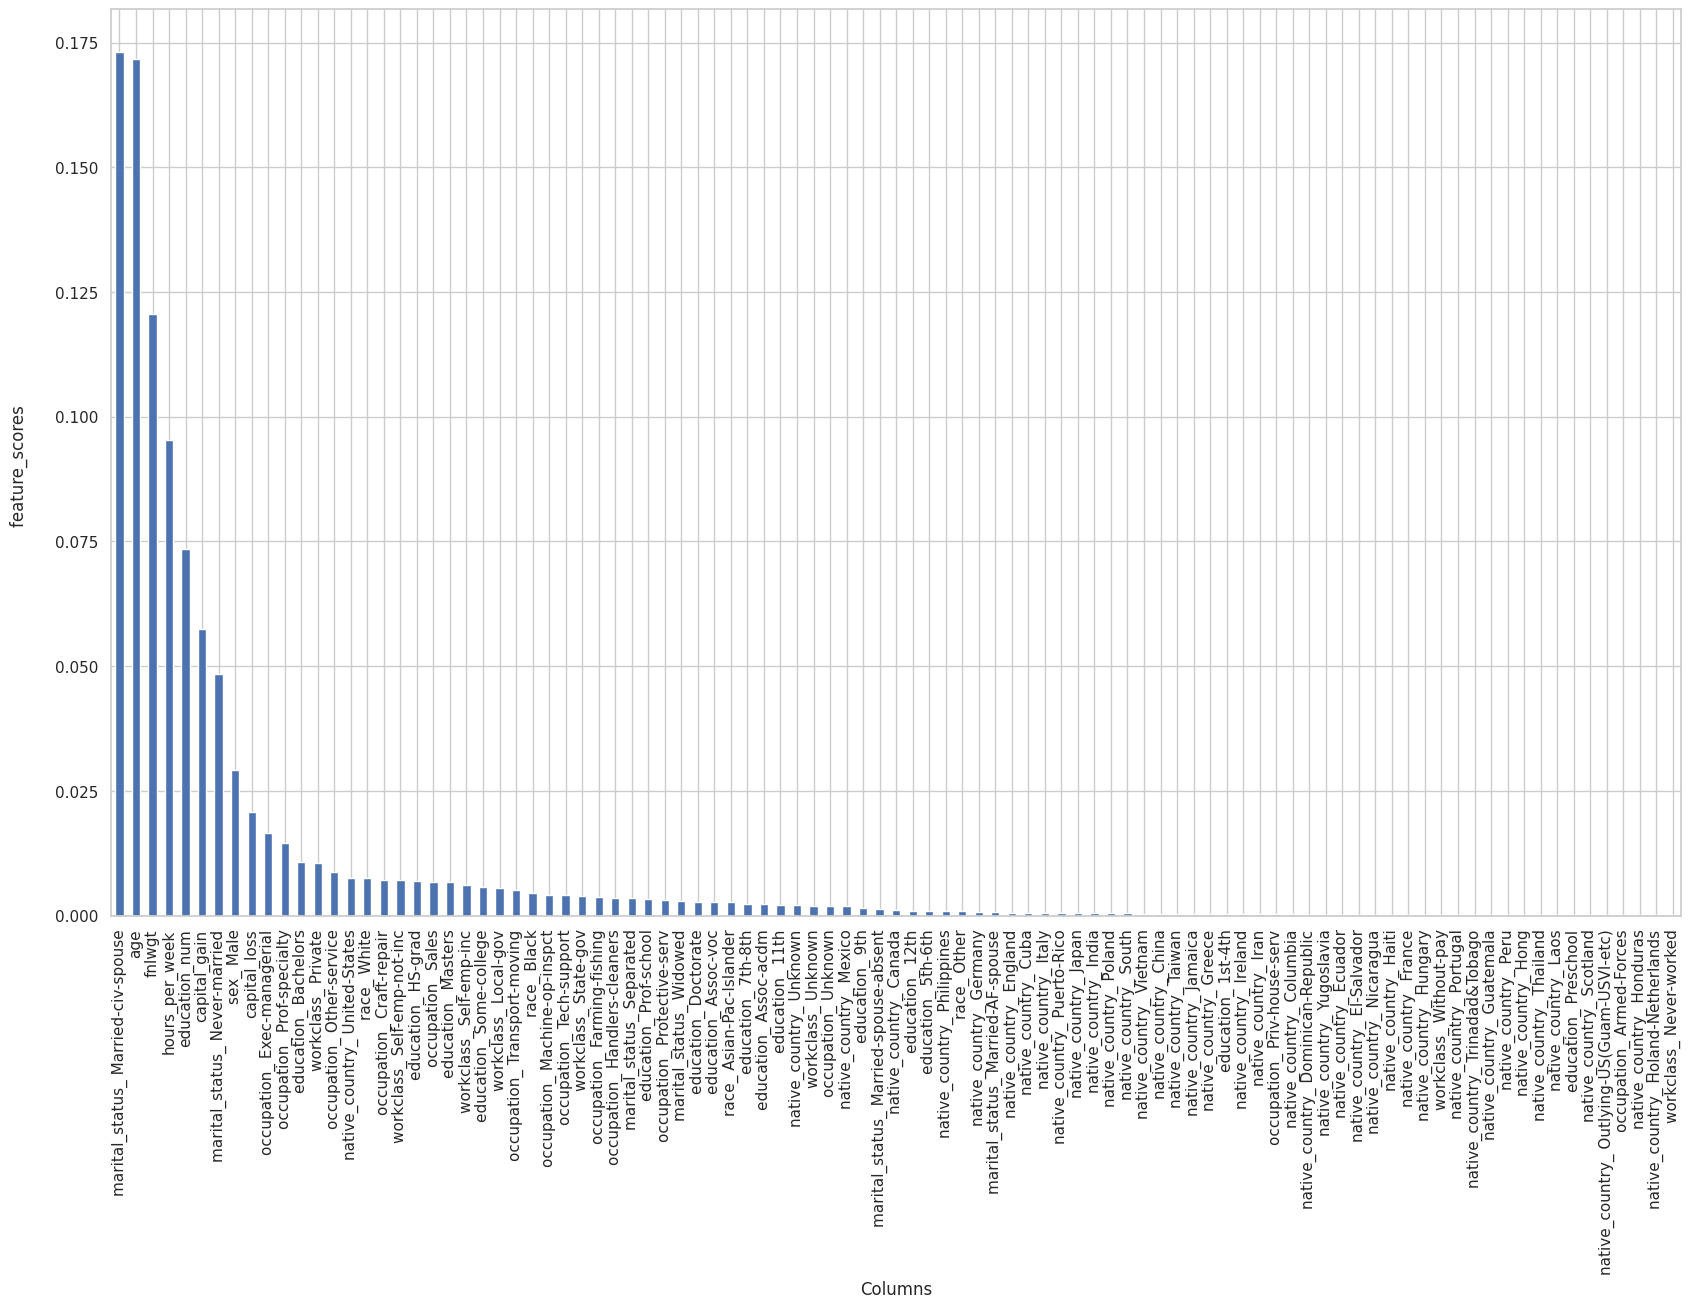

In [74]:
plt.figure(figsize = (17,10))
plt.xlabel('Columns')
plt.ylabel('feature_scores \n')
plt.tight_layout()
ft_scores.plot.bar()